# Peaks Detection

#### reference & data:
- data : https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv
- reference: https://www.researchgate.net/profile/Girish_Palshikar/publication/228853276_Simple_Algorithms_for_Peak_Detection_in_Time-Series/links/53fd70ca0cf2364ccc08c4d8.pdf

In [22]:
import matplotlib.pyplot as plt
import numpy as np 

#### Load Data

In [53]:
milk_data = pd.read_csv('milk_production.csv')

#### Get the time series data

In [54]:
time_series = milk_data['Monthly milk production (pounds per cow)']

#### Peak detection function

In [51]:
def peak_finding(data,window_size):
    """
    find values and positions of peaks in a given time series data. 
    return a list of tuples [(x1, max1), (x2, max2),..,(xn, maxn)]
    
    data :       a given time series data
    window_size: look for peaks in a box of "window_size" size

    """
    data_extended = np.concatenate([np.zeros(window_size),data,np.zeros(window_size)])
    max_list = []
        
    for i,value in enumerate(data_extended):
        if (i >= window_size) and (i < len(data_extended)-window_size):
            try:
                max_left = data_extended[(i-window_size):i+1].max()
                max_right = data_extended[i:(i+window_size)+1].max()
                chek_value = data_extended[i] - ((max_left+max_right)/2)
            except ValueError:
                 pass
                
            if (chek_value >=0):
                max_list.append((i-window_size,int(data[(i-window_size)])))
    return max_list

#### Find Peaks

In [68]:
# Find peaks with a windows size of 4
peaks_list_4 = peak_finding(time_series,4)
x_peaks_4 = [ x for x,y in peaks_list_4 ]
y_peaks_4 = [ y for x,y in peaks_list_4 ]

# Find peaks with a windows size of 1
peaks_list_1 = peak_finding(time_series,1)
x_peaks_1 = [ x for x,y in peaks_list_1 ]
y_peaks_1 = [ y for x,y in peaks_list_1 ]


#### Graphs

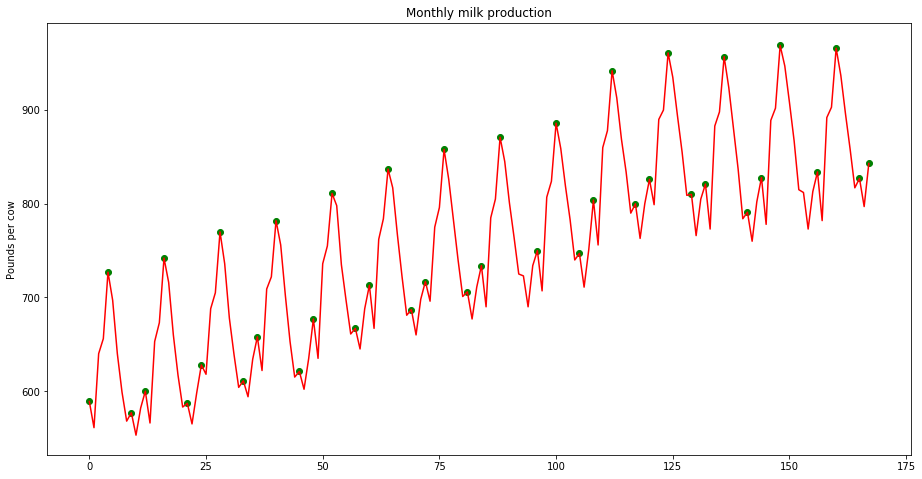

In [71]:
# create figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])

# set labels
ax.set_ylabel('Pounds per cow')
ax.set_title('Monthly milk production')

# plot graphs
ax.plot(time_series,color='red');

# Peaks with a windows size of 4
ax.scatter(x_peaks_4,y_peaks_4,color='blue');

# Peaks with a windows size of 1
ax.scatter(x_peaks_1,y_peaks_1,color='green');